# Shang Danqin auto MPG dataset analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [3]:
data = pd.read_csv('C:\\Users\shang\Desktop\Python\midterm\mpg.csv')

### Check the dataset

In [3]:
data.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [4]:
data.shape

(398, 9)

Check if there is missing data and the type of the data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null int64
name            398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


We can see that there is no missing data which is pretty good, but the type of horsepower is object while it appears to be numbers in the dataset

Let's check out why

In [6]:
data.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148', '129',
       '96', '71', '98', '115', '53', '81', '79', '120', '152', '102',
       '108', '68', '58', '149', '89', '63', '48', '66', '139', '103',
       '125', '133', '138', '135', '142', '77', '62', '132', '84', '64',
       '74', '116', '82'], dtype=object)

There is '?' in the dataset that may be a placeholder for missing data.
I will replace it with mean.

In [12]:
value = [int(val) for val in data['horsepower'].values if val !='?']
mean_horsepower = np.mean(value)
data['horsepower'] = data['horsepower'].apply(lambda x: int(x) if x !='?' else mean_horsepower)
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin            int64
name             object
dtype: object

In [8]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


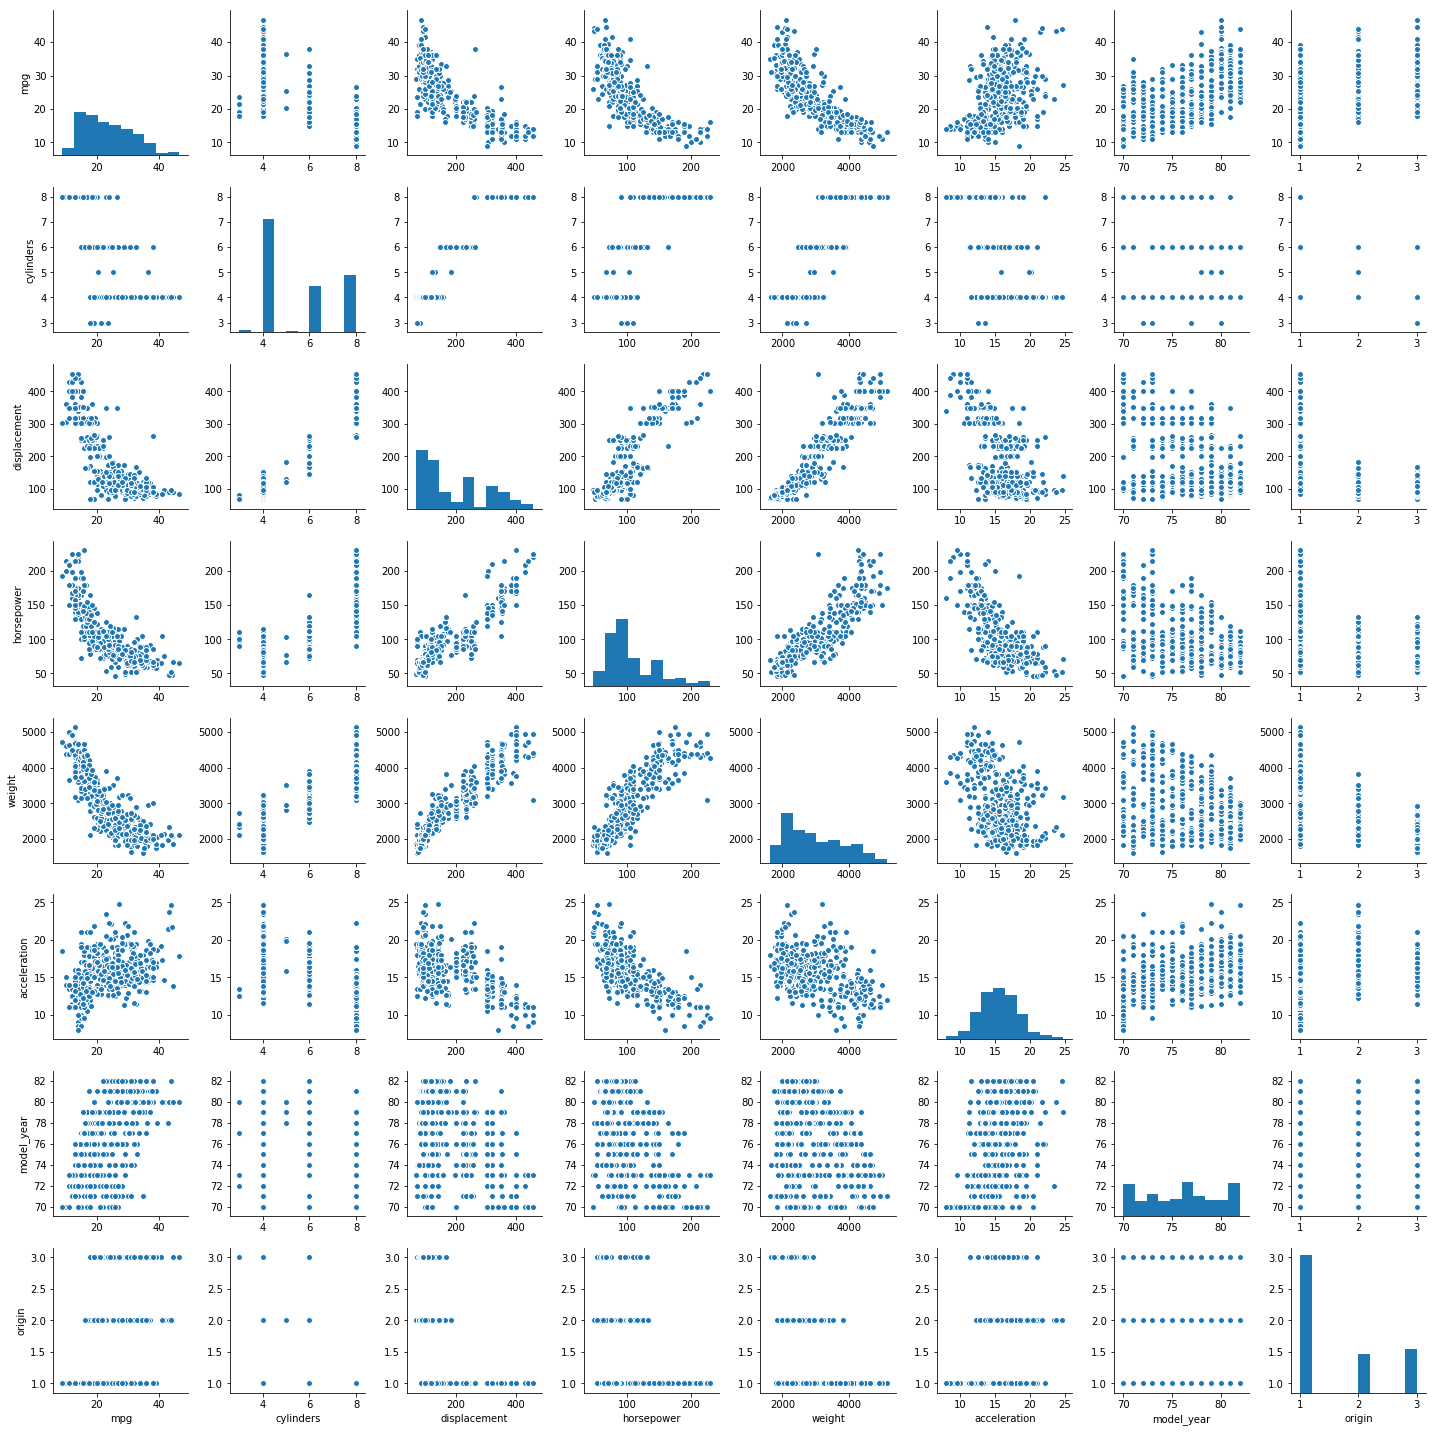

In [9]:
sns.pairplot(data)

In [10]:
list(data)

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model_year',
 'origin',
 'name']

It looks like mpg has some kind of linear relationship with displacement, horsepower, weight and acceleration.
Let's check out if discreate varibles influnce mpg

MPG & Cylinders

It seems cylinders 4 and 5 have higher MPG in general, and cylinder 8 has lowest mean of MPG

Text(0,0.5,'MPG')

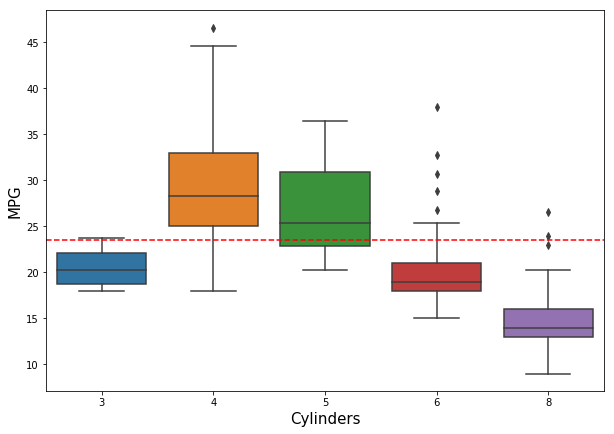

In [11]:
fig, ax = plt.subplots(figsize=(10,7))
ax = sns.boxplot(x='cylinders', y='mpg', data=data)
plt.axhline(data.mpg.mean(),color='r',linestyle='--')
ax.set_xlabel('Cylinders',size=15)
ax.set_ylabel('MPG',size=15)

MPG & Model_Year

We can see that MPG tends to increase as model_year increase

Text(0,0.5,'MPG')

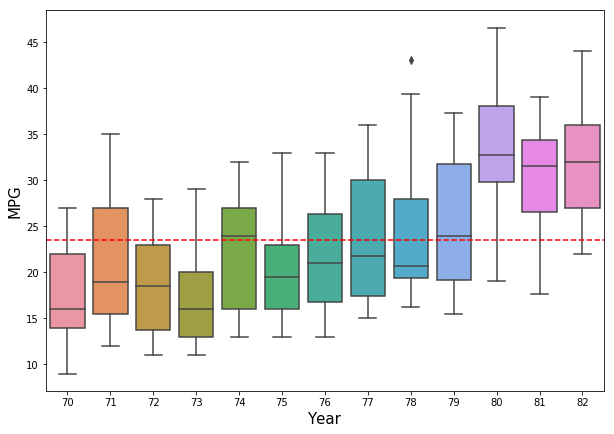

In [12]:
fig, ax = plt.subplots(figsize=(10,7))
ax = sns.boxplot(x='model_year', y='mpg', data=data)
plt.axhline(data.mpg.mean(),color='r',linestyle='--')
ax.set_xlabel('Year',size=15)
ax.set_ylabel('MPG',size=15)

MPG & Origin

It looks like auto of Japan performs better than USA on MPG

Text(0,0.5,'MPG')

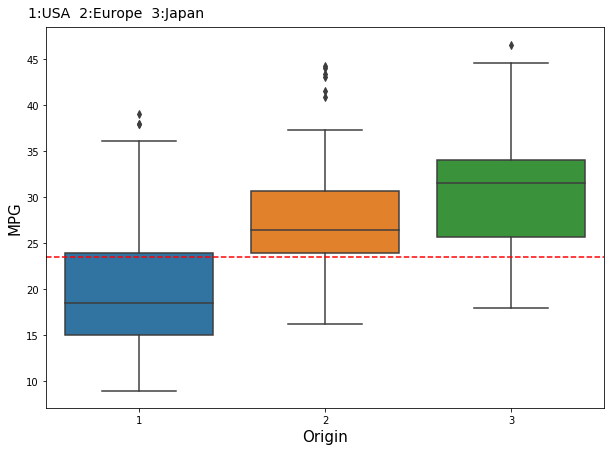

In [13]:
fig, ax = plt.subplots(figsize=(10,7))
ax = sns.boxplot(x='origin', y='mpg', data=data)
plt.axhline(data.mpg.mean(),color='r',linestyle='--')
plt.figtext(0.1,0.9,'1:USA  2:Europe  3:Japan',size=14)
ax.set_xlabel('Origin',size=15)
ax.set_ylabel('MPG',size=15)

Check out continuous variables with MPG

MPG is negatively related to displacement, horsepower and weight, while positively related with acceleration.

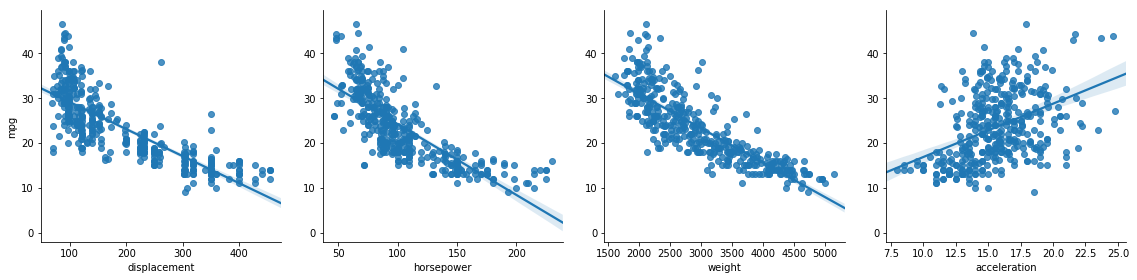

In [14]:
f = sns.PairGrid(data, y_vars=['mpg'], x_vars=['displacement','horsepower','weight','acceleration'],size=4)
f.map(sns.regplot)

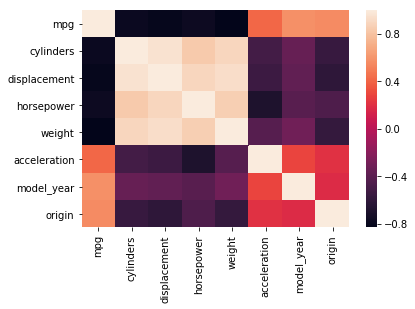

In [15]:
sns.heatmap(data.corr())

### Linear Regression Model

**Check Residual plot**

In [4]:
import statsmodels.formula.api as smf
model1 = smf.ols(formula='mpg~cylinders + displacement+ horsepower + weight +acceleration + model_year +origin', data=data).fit()
y = data['mpg']
fitted_y1 = model1.fittedvalues

Text(0,0.5,'Residuals')

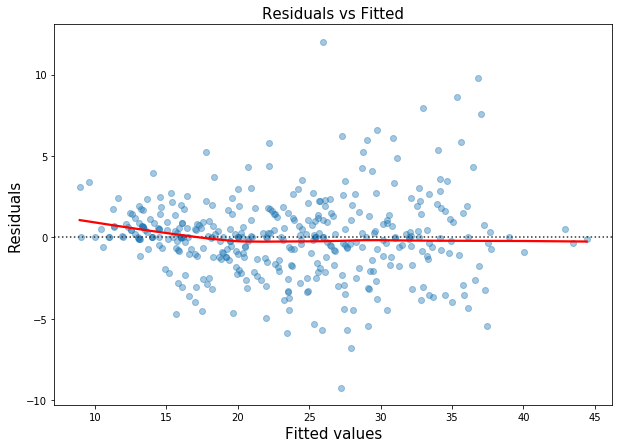

In [5]:
fig, ax = plt.subplots(figsize=(10,7))
sns.residplot(fitted_y1, 'mpg', data=data,lowess=True,scatter_kws={'alpha':0.4},line_kws={'color':'r'})
ax.set_title('Residuals vs Fitted',size=15)
ax.set_xlabel('Fitted values',size=15)
ax.set_ylabel('Residuals',size=15)

**From the Residuals vs Fitted plot, the results is fairly good enough, no need for further transformation**


In [11]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model_year        int64
origin            int64
name             object
dtype: object

Train Test Split

In [16]:
x = data[['cylinders','displacement','horsepower','weight','acceleration','model_year','origin']]
y = data['mpg']

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=123)

Training the model

In [18]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Predicting test data

In [19]:
pre = lm.predict(x_test)

Text(0,0.5,'Predicted Y')

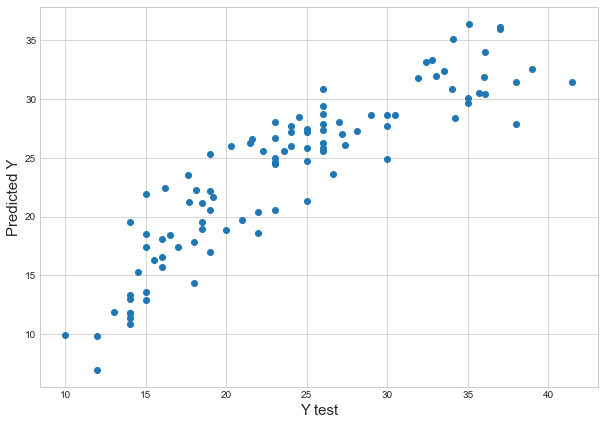

In [21]:
plt.subplots(figsize=(10,7))
sns.set_style('whitegrid')
plt.scatter(y_test,pre)
plt.xlabel('Y test',size=15)
plt.ylabel('Predicted Y',size=15)

The results is fairly good enough

Check Residuals, it is faily to say it is nomally distributed

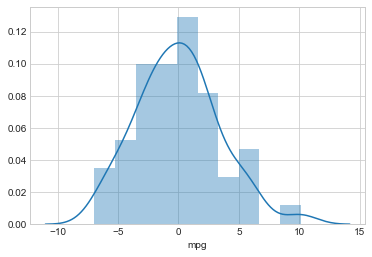

In [22]:
sns.distplot((y_test-pre))

Evaluating the model by calculating the Mean Absolute Error, Mean Squared Error and the Root Mean Squared Error.

In [23]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pre))
print('MSE:', metrics.mean_squared_error(y_test, pre))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pre)))

MAE: 2.68757254191
MSE: 11.6470237565
RMSE: 3.41277361636


Interpret Coefficient

In [24]:
pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])

,Coefficient
cylinders,-0.428157
displacement,0.014869
horsepower,0.008136
weight,-0.006579
acceleration,0.261398
model_year,0.765919
origin,1.627563


In [34]:
print('Intercept:', lm.intercept_)

Intercept: -75.9332930145


Interpreting the coefficients:

- Holding all other features fixed, a 1% increase in **displacement** is associated with an **decrease of 0.0275 units in MPG**.
- Holding all other features fixed, a 1% increase in **horsepower** is associated with an **decrease of 0.0586 units in MPG**.
- Holding all other features fixed, a 1% increase in **weight** is associated with an **decrease of 0.1185 units in MPG**.
- Holding all other features fixed, a 1% increase in **acceleration** is associated with an **decrease of 0.0356 units in MPG**.
